#Handling imbalance dataset & Hypertuning Neural_Network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras  import Sequential
from keras.layers import Activation,Dropout
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
#dataset is imbalance so we need to balance

In [ ]:
#independent and dependent
X =df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [ ]:
#shape of X and y
print('X_shape:',X.shape)
print('y_shape:',y.shape)

X_shape: (10000, 10)
y_shape: (10000,)


In [ ]:
#head of head
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
#converting cataogerical values in numerical values
geo =pd.get_dummies(X['Geography'],drop_first=True)
gen =pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#concating geo and gen in X
X =pd.concat([X,gen,geo],axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
#drop Geography	Gender
X.drop(columns=['Geography','Gender'],axis=1,inplace=True)

In [ ]:
print('X_shape',X.shape)

X_shape (10000, 11)


In [ ]:
#sacling
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_scale=Scaler.fit_transform(X)

In [ ]:
#balance the imbalance data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
#using smote 
smote =SMOTE(sampling_strategy='minority')
X_sm ,y_sm =smote.fit_sample(X_scale,y)
print('X_sm',X_sm.shape)
print('y_sm',y_sm.shape)

X_sm (15926, 11)
y_sm (15926,)


In [ ]:
np.unique(y_sm,return_counts=True)

(array([0, 1]), array([7963, 7963]))

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=12,stratify=y_sm)

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([2389, 2389]))

In [ ]:
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

X_train_shape (11148, 11)
X_test_shape (4778, 11)
y_train_shape (11148,)
y_test_shape (4778,)


In [ ]:
model =Sequential()
#1st_hidden_layer
model.add(Dense(units=25,activation='relu',kernel_initializer='he_uniform',input_dim=X_train.shape[1]))
#2nd_hidden_layer
model.add(Dense(units=40,activation='relu',kernel_initializer='he_uniform'))
#3rd_hidden_layer
model.add(Dense(units=40,activation='relu',kernel_initializer='he_uniform'))
#4th_hidden_layers
model.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))
#output_layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                615       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 3,611
Trainable params: 3,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_final =model.fit(x=X_train,y=y_train,batch_size=500,epochs=100,validation_split=.33)

Epoch 1/100
15/15 [==============================] - 15s 48ms/step - loss: 0.6975 - accuracy: 0.5432 - val_loss: 0.6298 - val_accuracy: 0.6483
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.6596 - val_loss: 0.5890 - val_accuracy: 0.6934
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.7016 - val_loss: 0.5635 - val_accuracy: 0.7165
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7209 - val_loss: 0.5417 - val_accuracy: 0.7301
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5324 - accuracy: 0.7384 - val_loss: 0.5246 - val_accuracy: 0.7423
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7423 - val_loss: 0.5056 - val_accuracy: 0.7464
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7479 - val_loss: 0.4919 - val_accuracy: 0.7537
Epoch 8/100

In [ ]:
y_pred =model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
from  sklearn import metrics
print('Accuracy_score:',metrics.accuracy_score(y_test,y_pred))
print('Classification_report:\n',metrics.classification_report(y_test,y_pred))
print('Confusion_matrics:\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_score: 0.8168689828380076
Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      2389
           1       0.80      0.85      0.82      2389

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

Confusion_matrics:
 [[1870  519]
 [ 356 2033]]


# Hyperparameter tuning the above models :

# Ways to hyperparameter tuning :

1.   Manual Hypertuning
2.   Automatic hyperparameter tuning

Methods to hyperparameter tuning :


1.   Random search 
2.   Grid  search
3.   Bayesian optimixation

Random search : In the random search method, we create a grid of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this grid, records the performance, and lastly returns the combination of hyperparameters which provided the best performance.

Grid Search :In the grid search method, we create a grid of possible values for hyperparameters. Each iteration tries a combination of hyperparameters in a specific order. It fits the model on each and every combination of hyperparameter possible and records the model performance. Finally, it returns the best model with the best hyperparameters. 

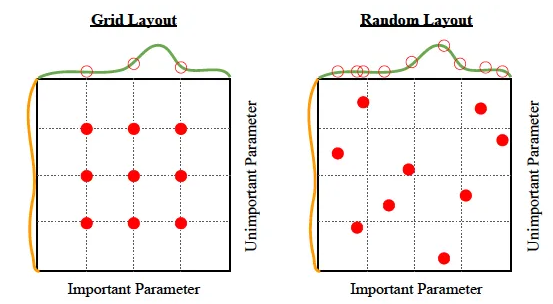

Bayesian Optimization :Tuning and finding the right hyperparameters for your model is an optimization problem. We want to minimize the loss function of our model by changing model parameters. Bayesian optimization helps us find the minimal point in the minimum number of steps. Bayesian optimization also uses an acquisition function that directs sampling to areas where an improvement over the current best observation is likely.


# ***Tool used for hyper parameter tuning (that are imp):***

*   Scikit-learn (random search cv ,grid search cv)
*   keras-tuner
*   Hyper-opt (Bayesian optimization)
*   Scikit-optimizer





In [ ]:
#we will implement all 3 above hyper parameter tuning methods
#Random Search
#Grid Srarch
#Bayesian optimization

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=ca0e08c00a1bc33419b264d36fc810ff8d029ba85297fc5250ac374b7834eee7
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
from keras.layers import Dense ,Activation,BatchNormalization,Dropout
from keras.optimizers import Adam,Adagrad,Adadelta,SGD,RMSprop,Adamax
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer , accuracy_score,classification_report,confusion_matrix 
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
#hypertuning 

In [ ]:
def bulid_model(layers,activation,optimizer,weight_int):
  model =Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=X_train.shape[1]))
      model.add(Activation(activation))
    else:
      model.add(Dense(nodes,activation=activation,kernel_initializer=weight_int))
      model.add(Activation(activation))
  model.add(Dense(1))
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [ ]:
model = KerasClassifier(build_fn=bulid_model, verbose=0)

In [ ]:
layer=[[20,25,30],[40,25],[45,30,15],[40,30,25]]
optimizer =['SGD','Adam','RMSprop','Adadalta','Adagrad','Adamax']
weight_int=['he_uniform','he_normal','glorot_normal','glorot_uniform']
activation=['relu','softmax','sigmoid','tanh','selu','elu','exponential','leaky_relu']
batch_size =[int(x) for x in np.linspace(100,1000,50)]
epochs =[int(x) for x in np.linspace(20,200,10)]
param_grid =dict(layers=layer,activation=activation,optimizer=optimizer,batch_size=batch_size,epochs=epochs,weight_int=weight_int)

In [ ]:
random =RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_jobs=-1,cv=5,verbose=5)

In [ ]:
random =random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.1min finished


In [ ]:
random.best_params_

{'activation': 'selu',
 'batch_size': 687,
 'epochs': 140,
 'layers': [20, 25, 30],
 'optimizer': 'RMSprop',
 'weight_int': 'glorot_normal'}

In [ ]:
random.best_score_

0.7893807053565979

In [ ]:
layer=[[40,25]]
optimizer =['Adam']
weight_int=['he_uniform','he_normal']
activation=['relu','elu']
batch_size =[int(x) for x in np.linspace(400,800,50)]
epochs =[75,100,125,130,140]
param_grid_1 =dict(layers=layer,activation=activation,optimizer=optimizer,batch_size=batch_size,epochs=epochs,weight_int=weight_int)

In [ ]:
grid = GridSearchCV(estimator=model,param_grid=param_grid_1,n_jobs=-1,cv=2,verbose=5)

In [47]:
grid_ge =grid.fit(X_train,y_train)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 71.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 86.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 95.0min finished


In [48]:
grid_ge.best_score_

0.792429119348526

In [ ]:
#hyperparameter tuning using Keras-tuner

In [67]:
!pip install keras-tuner

In [103]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [104]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [105]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     directory='project',
    project_name='churn_model')

In [106]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [107]:
tuner.search(X_train, y_train, epochs=5, validation_split=0.2)
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.8319880366325378

Best val_accuracy So Far: 0.8319880366325378
Total elapsed time: 00h 02m 27s
INFO:tensorflow:Oracle triggered exit


In [124]:
tuner.results_summary()

Results summary
Results in project/churn_model
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 18
units_0: 256
units_1: 256
learning_rate: 0.0001
units_2: 480
units_3: 320
units_4: 128
units_5: 416
units_6: 128
units_7: 288
units_8: 160
units_9: 448
units_10: 352
units_11: 256
units_12: 128
units_13: 160
units_14: 64
units_15: 96
units_16: 32
units_17: 352
units_18: 384
Score: 0.8319880366325378
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 384
learning_rate: 0.001
units_2: 352
units_3: 480
units_4: 384
units_5: 128
units_6: 288
units_7: 480
units_8: 480
units_9: 128
units_10: 224
units_11: 320
units_12: 128
units_13: 352
units_14: 192
units_15: 480
units_16: 352
units_17: 288
units_18: 160
Score: 0.8260089755058289
Trial summary
Hyperparameters:
num_layers: 4
units_0: 448
units_1: 352
learning_rate: 0.0001
units_2: 32
units_3: 32
Score: 0.8191330432891846
Trial summary
Hyperparameters:
num_layers: 1

In [125]:
#BayesianOptimization
#In_2nd_part